In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings                   
warnings.filterwarnings('ignore')

In [23]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df[df['species']=="virginica"].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [25]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [26]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
X.shape,y.shape

((150, 4), (150,))

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=32)


In [30]:
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [31]:
y_train.shape,y_test.shape

((120,), (30,))

In [32]:
#post pronunnning
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [33]:
y_pred=classifier.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [47]:
print("Traing_score=",classifier.score(X_train,y_train))
print("Testing_score=",classifier.score(X_test,y_test))

Traing_score= 1.0
Testing_score= 0.9666666666666667


In [49]:
accuracy_score(y_pred,y_test)

0.9666666666666667

# predection test

In [46]:
#sepal_length	sepal_width	petal_length	petal_width	
classifier.predict([[6.3,2.9,5.6,1.8]])

array(['virginica'], dtype=object)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.439\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.6\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156

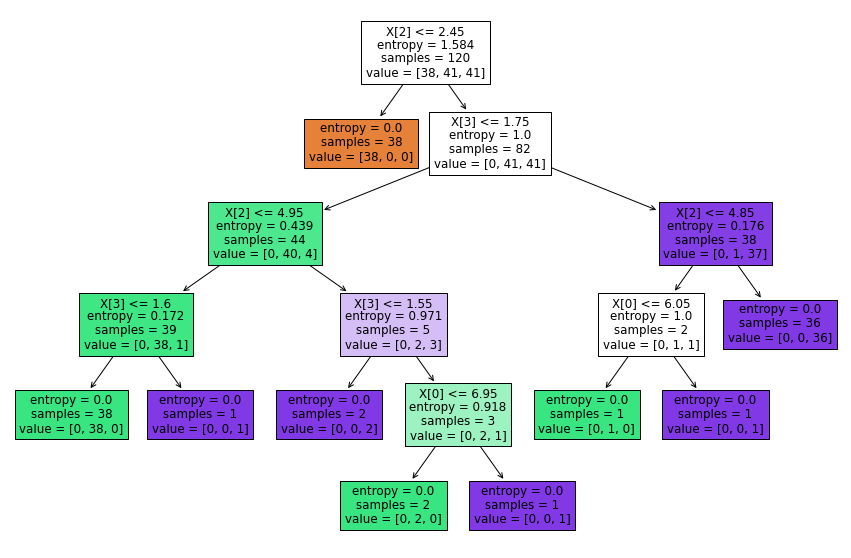

In [35]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [ ]:
#prepruning technique

In [36]:
params={"max_depth":[2,4,6,8,10,12],"min_samples_split":[2,3,4],"min_samples_leaf":[1,2]}

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf=tree.DecisionTreeClassifier()
gcv=GridSearchCV(estimator=clf,param_grid=params)

In [38]:
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [39]:
gcv.best_params_

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [40]:
modl2=DecisionTreeClassifier(max_depth=2,min_samples_leaf=1,min_samples_split=2)
modl2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [42]:
y_pdcc=modl2.predict(X_test)

In [44]:
print("Traing_score=",modl2.score(X_train,y_train))
print("Testing_score=",modl2.score(X_test,y_test))

Traing_score= 0.9583333333333334
Testing_score= 0.9666666666666667


In [43]:
#accurac score of the model
accuracy_score(y_pdcc,y_test)

0.9666666666666667

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]')]

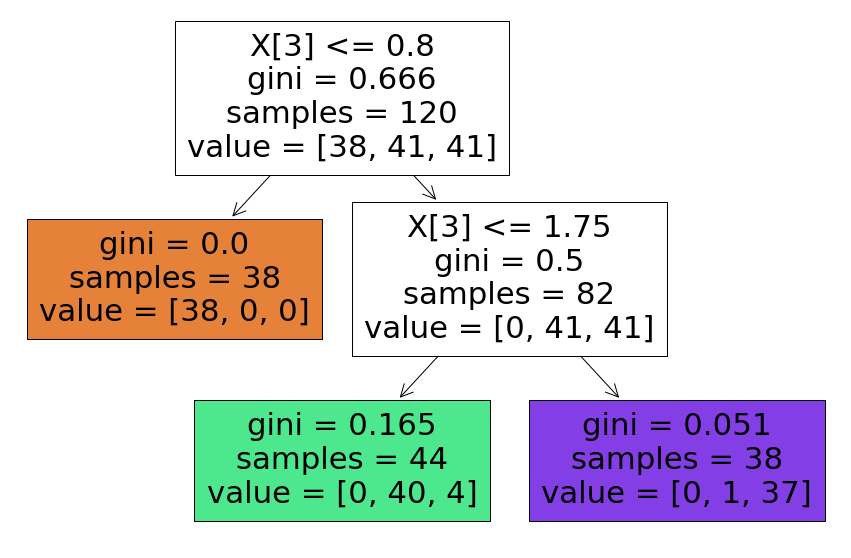

In [20]:
#preprounning gridsearchcv/crossvalscore/regression
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(modl2,filled=True)

In [51]:
print(classification_report(y_pdcc,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.90      0.95        10
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

